In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

Il dataset Iris è un dataset multivariato. Consiste in 150 istanze di Iris classificate secondo tre specie: Iris setosa, Iris virginica e Iris versicolor. Le quattro variabili considerate sono la lunghezza e la larghezza del sepalo e del petalo.

In [2]:
dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
X=dataset['data']
y=dataset['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
#visualizzaizone di un esempio
for i in range(0,5):
    print("feature ->{input_data}\n Class:{label}".format(input_data=X[i], label=y[i]))
    #dove è presente il token input_data utilizzo X,, dove il token label, y

feature ->[5.1 3.5 1.4 0.2]
 Class:0
feature ->[4.9 3.  1.4 0.2]
 Class:0
feature ->[4.7 3.2 1.3 0.2]
 Class:0
feature ->[4.6 3.1 1.5 0.2]
 Class:0
feature ->[5.  3.6 1.4 0.2]
 Class:0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
p_test=model.predict(X_test)
print(accuracy_score(y_test, p_test))

1.0


Recupero della struttura dell'albero creato utile a capire il percorso costruito dal modello tra i nodi, per poi visualizzarla analizzandone i nodi e come sono collegati tra loro tramite l'attributo [tree_] del modello.

In [11]:
n_nodes = model.tree_.node_count #conteggio dei nodi 
children_left = model.tree_.children_left  #a sinistra del root node
children_right = model.tree_.children_right
feature = model.tree_.feature #su cui il root node sta operando 
threshold = model.tree_.threshold #soglia nel blocco per decidere lo split

print(n_nodes)
print(children_left)

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # iniziamo dal nodo radice che ha id 0 e profondità 0
while len(stack) > 0:
    # tramite la [pop] ci assicuriamo di
    # esplorare ogni nodo solo una volta
    node_id, depth = stack.pop() #.pop() rimuove elementi nella posizione data
    node_depth[node_id] = depth

    # quando i nodi figli dx e sx sono diversi abbiamo uno split
    is_split_node = children_left[node_id] != children_right[node_id]
    # nel caso di split appendiamo i nodi figli dx e sx in [stack]
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("La struttura dell'albero binario ha {n} nodi ed ha "
      "la seguente struttura:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("\nnodo={node} is a leaf.".format(node=i))
    else:
        print("\nnodo={node} is a split node: "
              "passa al nodo {left} se X[:, {feature}] <= {threshold} "
              "else passa al nodo {right}.".format(
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

19
[ 1 -1  3  4 -1 -1  7  8 -1 10 -1 12 -1 -1 15 16 -1 -1 -1]
La struttura dell'albero binario ha 19 nodi ed ha la seguente struttura:


nodo=0 è un nodo di split: passa al nodo 1 se X[:, 2] <= 2.449999988079071 altrimenti passa al nodo 2.

nodo=1 è un nodo foglia.

nodo=2 è un nodo di split: passa al nodo 3 se X[:, 2] <= 4.75 altrimenti passa al nodo 6.

nodo=3 è un nodo di split: passa al nodo 4 se X[:, 3] <= 1.600000023841858 altrimenti passa al nodo 5.

nodo=4 è un nodo foglia.

nodo=5 è un nodo foglia.

nodo=6 è un nodo di split: passa al nodo 7 se X[:, 3] <= 1.75 altrimenti passa al nodo 14.

nodo=7 è un nodo di split: passa al nodo 8 se X[:, 2] <= 4.950000047683716 altrimenti passa al nodo 9.

nodo=8 è un nodo foglia.

nodo=9 è un nodo di split: passa al nodo 10 se X[:, 3] <= 1.550000011920929 altrimenti passa al nodo 11.

nodo=10 è un nodo foglia.

nodo=11 è un nodo di split: passa al nodo 12 se X[:, 2] <= 5.450000047683716 altrimenti passa al nodo 13.

nodo=12 è un nodo foglia

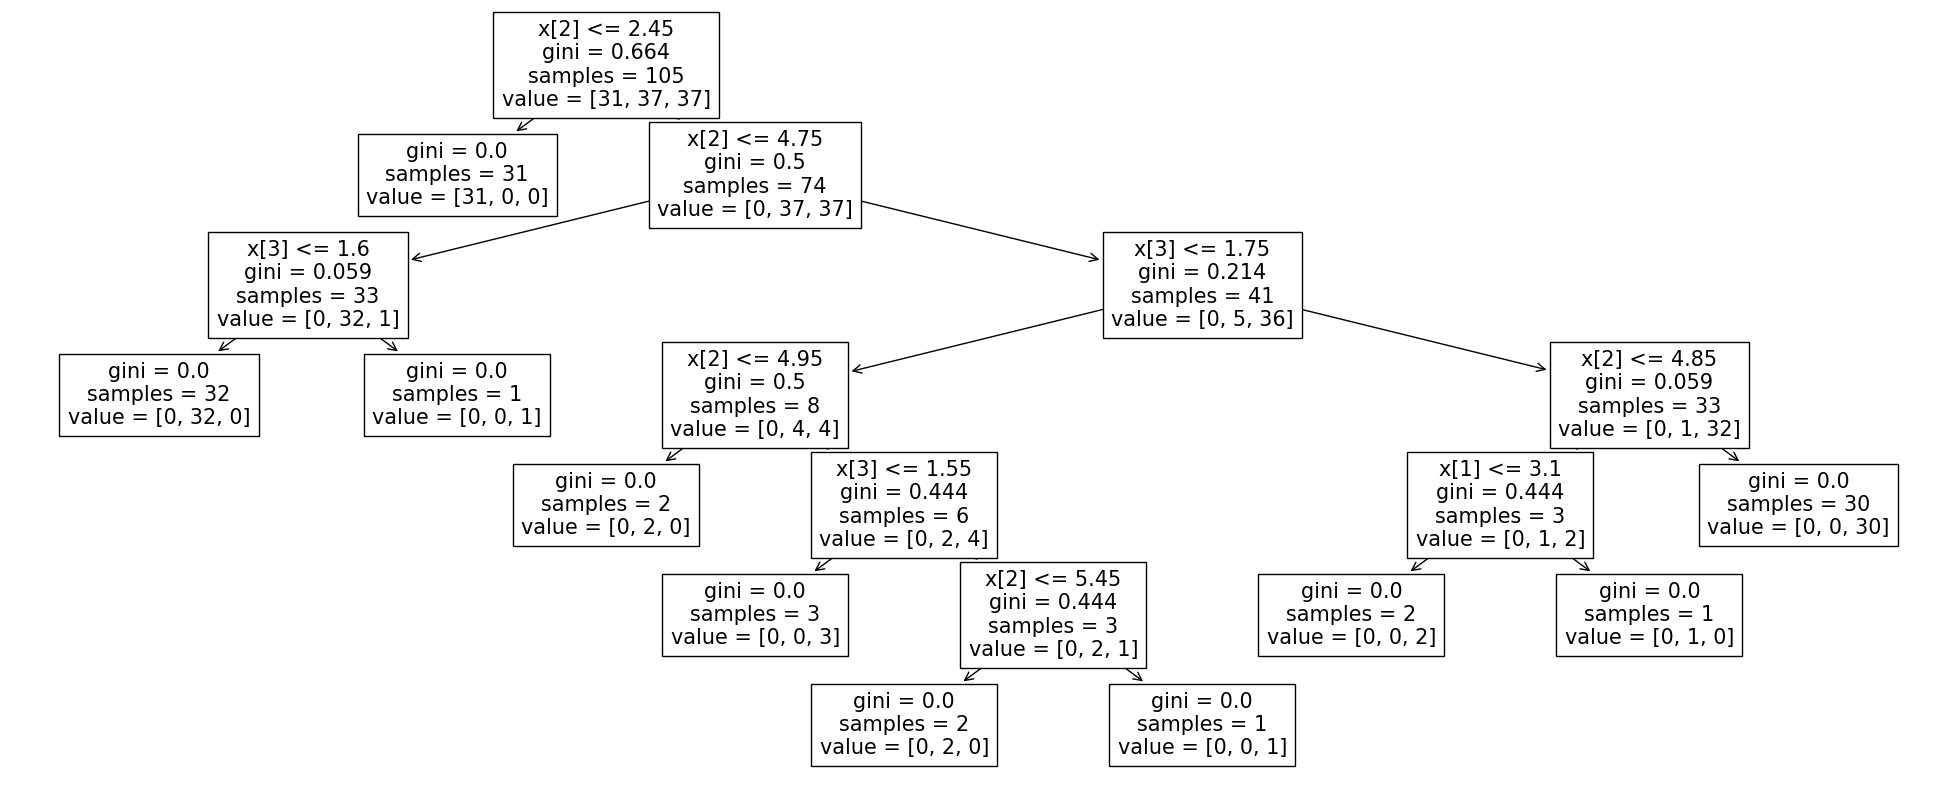

In [12]:
plt.figure(figsize=(25,10))
tree.plot_tree(model)
plt.show()
           

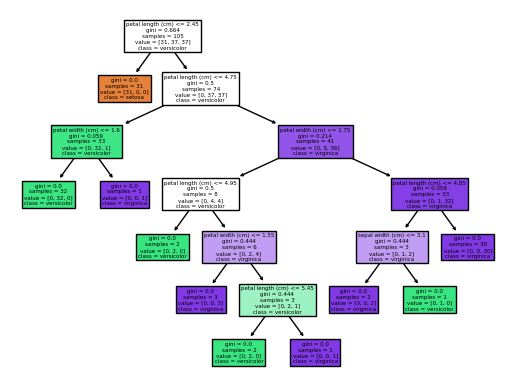

In [13]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True); #colora i nodi
fig.savefig('imagename.png')